In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
device_df = pd.read_csv('../data/mobile_data/user_device.csv')
usage_df = pd.read_csv('../data/mobile_data/user_usage.csv')

In [4]:
device_df.head()

,user_id,platform,platform_version,device
0,22782,ios,10.2,"iPhone7,2"
1,22783,android,6.0,Nexus 5
2,22784,android,5.1,SM-G903F
3,22785,ios,10.2,"iPhone7,2"
4,22786,android,6.0,ONE E1003


In [5]:
usage_df.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,user_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [6]:
all_df = pd.merge(device_df, usage_df, on='user_id', how='inner')

In [8]:
all_df.head()

,user_id,platform,platform_version,device,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22787,android,4.3,GT-I9505,21.97,4.82,1557.33
1,22788,android,6.0,SM-G930F,1710.08,136.88,7267.55
2,22789,android,6.0,SM-G930F,1710.08,136.88,7267.55
3,22790,android,5.1,D2303,94.46,35.17,519.12
4,22792,android,5.1,SM-G361F,71.59,79.26,1557.33


In [11]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 7 columns):
user_id                    159 non-null int64
platform                   159 non-null object
platform_version           159 non-null float64
device                     159 non-null object
outgoing_mins_per_month    159 non-null float64
outgoing_sms_per_month     159 non-null float64
monthly_mb                 159 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 9.9+ KB


**note1**

- ```all_df['a'] = all_df['a'].astype('str')```, float -> str
- ```all_df['a+b'] = all_df['a'].str.cat( all_df['b'], sep='_')```, combine 2 colums

In [13]:
all_df['platform_version'] = all_df['platform_version'].astype('str')
all_df['system'] = all_df['platform'].str.cat(all_df['platform_version'], sep='_')

In [14]:
all_df.head()

,user_id,platform,platform_version,device,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,system
0,22787,android,4.3,GT-I9505,21.97,4.82,1557.33,android_4.3
1,22788,android,6.0,SM-G930F,1710.08,136.88,7267.55,android_6.0
2,22789,android,6.0,SM-G930F,1710.08,136.88,7267.55,android_6.0
3,22790,android,5.1,D2303,94.46,35.17,519.12,android_5.1
4,22792,android,5.1,SM-G361F,71.59,79.26,1557.33,android_5.1


**note2**

- ```df.plot(kind='bar', rot=45)```

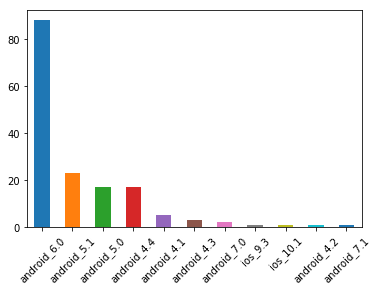

In [20]:
all_df.system.value_counts().plot(kind='bar', rot=45)

Text(0,0.5,'Monthly Usage (MB)')

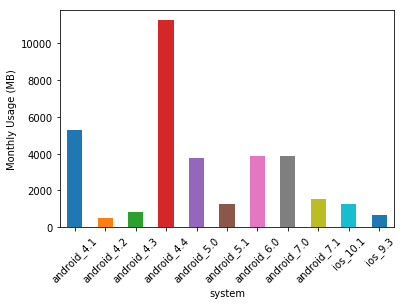

In [22]:
all_df.groupby('system')['monthly_mb'].mean().plot(kind='bar',rot=45)
plt.ylabel('Monthly Usage (MB)')

```python
"""
    明确任务：
        统计不同手机操作系统的每月流量使用情况
"""
import os
import pandas as pd
import matplotlib.pyplot as plt

# 用户及其使用的手机数据文件
user_device_datafile_path = './data_pd/mobile_data/user_device.csv'

# 用户及其套餐使用情况的数据文件
user_usage_datafile_path = './data_pd/mobile_data/user_usage.csv'


# 结果保存路径
output_path = './output'
if not os.path.exists(output_path):
    os.makedirs(output_path)


def collect_data():
    """
        数据获取
    """
    user_device_df = pd.read_csv(user_device_datafile_path)
    user_usage_df = pd.read_csv(user_usage_datafile_path)
    return user_device_df, user_usage_df


def process_data(user_device_df, user_usage_df):
    """
        数据处理
    """
    # 字符串列合并
    user_device_df['platform_version'] = user_device_df['platform_version'].astype('str')
    user_device_df['system'] = user_device_df['platform'].str.cat(user_device_df['platform_version'], sep='_')

    # 合并数据集
    merged_df = pd.merge(user_device_df, user_usage_df, how='inner', on='user_id')

    return merged_df


def analyze_data(merged_df):
    """
        数据分析
    """
    system_usage_ser = merged_df.groupby('system')['monthly_mb'].mean()
    system_usage_ser.sort_values(ascending=False, inplace=True)
    return system_usage_ser


def save_plot_results(system_usage_ser):
    """
        结果展示
    """
    system_usage_ser.to_csv(os.path.join(output_path, 'mobile_system_usage.csv'))

    system_usage_ser.plot(kind='bar', rot=45)
    plt.ylabel('Monthly Usage (MB)')
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'mobile_system_usage.png'))
    plt.show()


def main():
    """
        主函数
    """
    # 数据收集
    user_device_df, user_usage_df = collect_data()

    # 数据处理
    merged_df = process_data(user_device_df, user_usage_df)

    # 数据分析
    system_usage_ser = analyze_data(merged_df)

    # 结果展示
    save_plot_results(system_usage_ser)


if __name__ == '__main__':
    main()
```